### Mini Project

Database: World Development Indicators Dataset

EG.ELC.RNEW.ZS 	Renewable electricity output (% of total electricity output)

EN.ATM.CO2E.PC 	CO2 emissions (metric tons per capita) 


# Step 1 - Select a dataset

Data Source: https://www.kaggle.com/worldbank/world-development-indicators  
Folder: 'world-development-indicators'

# Step 2 - Explore the dataset

In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [331]:
data = pd.read_csv('./Indicators.csv')

(5656458, 6)

# Step 2 - Explore the dataset

### What kind of data this dataset have?

In [332]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### Do we have any indicator of renewable energy?

In [333]:
# filter dataset by indicator of % of renwable eletricity
search = 'renewable'
mask = data['IndicatorName'].str.contains(search, case=False)
result = data[mask]

# show unique values
len(result['IndicatorName'].unique().tolist())

7

In [334]:
result['IndicatorName'].unique().tolist()

['Combustible renewables and waste (% of total energy)',
 'Electricity production from renewable sources, excluding hydroelectric (kWh)',
 'Electricity production from renewable sources, excluding hydroelectric (% of total)',
 'Renewable internal freshwater resources per capita (cubic meters)',
 'Renewable internal freshwater resources, total (billion cubic meters)',
 'Renewable electricity output (% of total electricity output)',
 'Renewable energy consumption (% of total final energy consumption)']

Yes we have. Renewable energy consumption (% of total final energy consumption) seems like a good indicator to use.

### How many unique values are in the dataset for the renewable eletricity indicator?

In [335]:
# filter dataset by indicator of % of renwable eletricity
indicator_rnew = 'Renewable energy consumption \(%'
mask_rnew = data['IndicatorName'].str.contains(indicator_rnew)
data_rnew = data[mask_rnew]

# show unique values
len(data_rnew['CountryName'].unique().tolist())

221

### How about the CO2 per capita?

In [336]:
indicator_co2 = 'CO2 emissions \(metric'
mask_co2 = data['IndicatorName'].str.contains(indicator_co2)
data_co2 = data[mask_co2]

# show unique values
len(data_co2['CountryName'].unique().tolist())

232

Looks like we have a fair amount of unique countries to work with in both indicators.

### How many yearf of data in these indicators we have?

In [337]:
data_rnew_year = data_rnew['Year'].unique().tolist()
len(data_rnew_year)

23

In [339]:
data_co2_year = data_co2['Year'].unique().tolist()
len(data_co2_year)

52

### What's the range of years?

In [340]:
print(min(data_rnew_year)," to ",max(data_rnew_year))

1990  to  2012


In [341]:
print(min(data_co2_year)," to ",max(data_co2_year))

1960  to  2011


The CO2 indicator has more data on the dataset. The gap between 1960-1990 and the last year (2012) should be filtered out.

# Step 3 - Search Question

## There is a significant correlation between the amount of renewable energy and the CO2 emissions in the countries?

# Step 4 - Answering the question

Look at the indicators for one country, Germany.

In [556]:
hist_indicator = 'EG.ELC.RNEW.ZS' 
hist_country = 'DEU'

mask1 = data['IndicatorCode'].eq(hist_indicator)
mask2 = data['CountryCode'].eq(hist_country)
mask3 = data['Year'].between(1991,2011)

energy_stage = data[mask1 & mask2 & mask3]

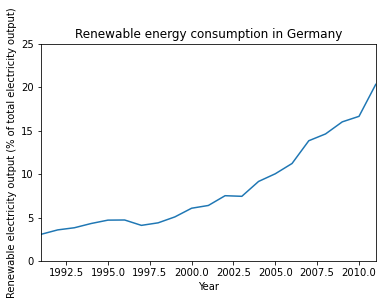

In [557]:
plt.plot(energy_stage['Year'].values, energy_stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(energy_stage['IndicatorName'].iloc[0])

plt.title('Renewable energy consumption in Germany')

plt.axis([1991, 2011,0,25])

plt.show()

In [558]:
hist_indicator = 'EN.ATM.CO2E.PC'
hist_country = 'DEU'

mask1 = data['IndicatorCode'].eq(hist_indicator)
mask2 = data['CountryCode'].eq(hist_country)
mask3 = data['Year'].between(1991,2011)

co2_stage = data[mask1 & mask2 & mask3]

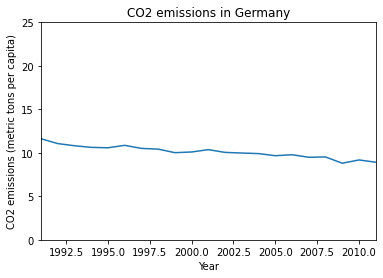

In [559]:
plt.plot(co2_stage['Year'].values, co2_stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(co2_stage['IndicatorName'].iloc[0])

plt.title('CO2 emissions in Germany')

plt.axis([1991, 2011,0,25])

plt.show()

Seems like we can have a negative correlation between the two indicators.

In [560]:
# just to make sure we have the same amoutn or years
print(len(energy_stage))
print(len(co2_stage))

21
21


Using a scatterplot to compare both indicators

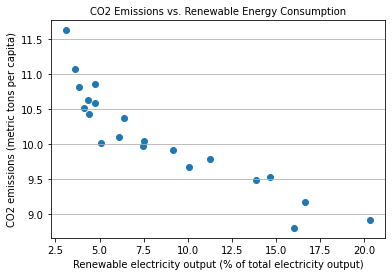

In [561]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. Renewable Energy Consumption',fontsize=10)
axis.set_xlabel(energy_stage['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(co2_stage['IndicatorName'].iloc[0],fontsize=10)

X = energy_stage['Value']
Y = co2_stage['Value']

axis.scatter(X, Y)
plt.show()

This look like a strong negative correlation, let's see with coorcoef.

In [562]:
np.corrcoef(energy_stage['Value'],co2_stage['Value'])

array([[ 1.        , -0.90872475],
       [-0.90872475,  1.        ]])

## Ok, how about the top 5 countries in renewable energy?
According to https://www.climatecouncil.org.au/11-countries-leading-the-charge-on-renewable-energy/ the top 10 are:
- SWEDEN
- COSTA RICA
- NICARAGUA
- SCOTLAND
- GERMANY

In [568]:
hist_indicator = 'EG.ELC.RNEW.ZS' 
hist_country = ['SWE','CRI','NIC','GBR','DEU','URY','DNK']

mask1 = data['IndicatorCode'].eq(hist_indicator)
mask2 = data['CountryCode'].isin(hist_country)
mask3 = data['Year'].between(1991,2011)

energy_stage = data[mask1 & mask2 & mask3]

In [569]:
hist_indicator = 'EN.ATM.CO2E.PC'
hist_country = ['SWE','CRI','NIC','GBR','DEU','URY','DNK']

mask1 = data['IndicatorCode'].eq(hist_indicator)
mask2 = data['CountryCode'].isin(hist_country)
mask3 = data['Year'].between(1991,2011)

co2_stage = data[mask1 & mask2 & mask3]

Seems like we can have a negative correlation between the two indicators.

In [570]:
# just to make sure we have the same amoutn or years
print(len(energy_stage))
print(len(co2_stage))

147
147


Using a scatterplot to compare both indicators

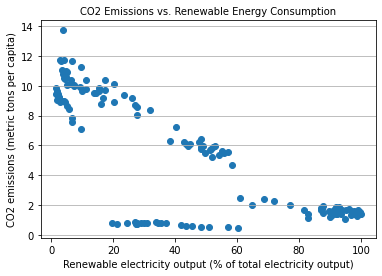

In [573]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. Renewable Energy Consumption',fontsize=10)
axis.set_xlabel(energy_stage['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(co2_stage['IndicatorName'].iloc[0],fontsize=10)

X = energy_stage['Value']
Y = co2_stage['Value']

axis.scatter(X, Y)
plt.show()

This look like a strong negative correlation, let's see with coorcoef.

In [572]:
np.corrcoef(energy_stage['Value'],co2_stage['Value'])

array([[ 1.        , -0.79756351],
       [-0.79756351,  1.        ]])